# RNN Implementation in Python using Keras

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
#Importing the useful methods from the RNN library keras (sublibrary of tensorflow)
from keras.layers import SimpleRNN, Embedding, Dense, LSTM, GRU
from keras.models import Sequential

#Importing th basic math,plotting and data manipulation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

In [47]:
#Reading the data from the csv file and taking a look at it
data = pd.read_csv("/content/drive/MyDrive/spam_(2).csv",encoding='latin1')
data.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [48]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [49]:
data.rename(columns={'v1':'Category'},inplace=True)

In [50]:
data.rename(columns={'v2':'Message'},inplace=True)
data.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [51]:
#Generating the training/test data for the model and assigning numerical labels 0(nonspam), 1(spam).

emails = []
labels = []
for i, label in enumerate(data['Category']):
    emails.append(data['Message'][i])
    if label == 'ham':
        labels.append(0)
    else:
        labels.append(1)

emails = np.asarray(emails)
labels = np.asarray(labels)


print("number of emails :" , len(emails))
print("number of labels: ", len(labels))

number of emails : 5572
number of labels:  5572


In [52]:
#from keras.layers import SimpleRNN, Embedding, Dense, LSTM
#from keras.models import Sequential

#Import libraries for preprocessing text
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# number of words used as features
max_features = 10000
# cut off the words after seeing 500 words in each document(email)
maxlen = 500


# we will use 80% of data as training, 20% as validation data
training_samples = int(len(emails) * .8)
test_samples = int(len(emails) - training_samples)

print("The number of training {0}, validation {1} ".format(training_samples, test_samples))

tokenizer = Tokenizer()
tokenizer.fit_on_texts(emails)
sequences = tokenizer.texts_to_sequences(emails)


word_index = tokenizer.word_index
print("Found {0} unique words: ".format(len(word_index)))

first_email = []
for i in sequences[0]:
    first_email.append([word for word, index in word_index.items() if index == i][0]);
print(first_email)

data = pad_sequences(sequences, maxlen=maxlen)

print("data shape: ", data.shape)

np.random.seed(23)
# shuffle data
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]


emails_train = data[:training_samples]
y_train = labels[:training_samples]
emails_test = data[training_samples:]
y_test = labels[training_samples:]

The number of training 4457, validation 1115 
Found 8920 unique words: 
['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']
data shape:  (5572, 500)


In [53]:
#Define the RNN model

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_rnn = model.fit(emails_train, y_train, epochs=10, batch_size=60, validation_split=0.2)

Epoch 1/10
60/60 [==============================] - 6s 84ms/step - loss: 0.5177 - acc: 0.7708 - val_loss: 0.3434 - val_acc: 0.8722
Epoch 2/10
60/60 [==============================] - 4s 72ms/step - loss: 0.1748 - acc: 0.9456 - val_loss: 0.1294 - val_acc: 0.9574
Epoch 3/10
60/60 [==============================] - 5s 81ms/step - loss: 0.0796 - acc: 0.9756 - val_loss: 0.0816 - val_acc: 0.9776
Epoch 4/10
60/60 [==============================] - 5s 76ms/step - loss: 0.0385 - acc: 0.9896 - val_loss: 0.0633 - val_acc: 0.9787
Epoch 5/10
60/60 [==============================] - 4s 71ms/step - loss: 0.0347 - acc: 0.9888 - val_loss: 0.0555 - val_acc: 0.9832
Epoch 6/10
60/60 [==============================] - 6s 91ms/step - loss: 0.0163 - acc: 0.9961 - val_loss: 0.0555 - val_acc: 0.9854
Epoch 7/10
60/60 [==============================] - 4s 69ms/step - loss: 0.0283 - acc: 0.9913 - val_loss: 0.0663 - val_acc: 0.9798
Epoch 8/10
60/60 [==============================] - 5s 80ms/step - loss: 0.0239 - a

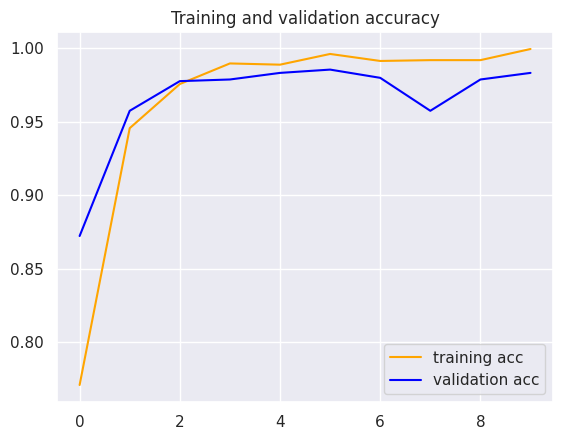

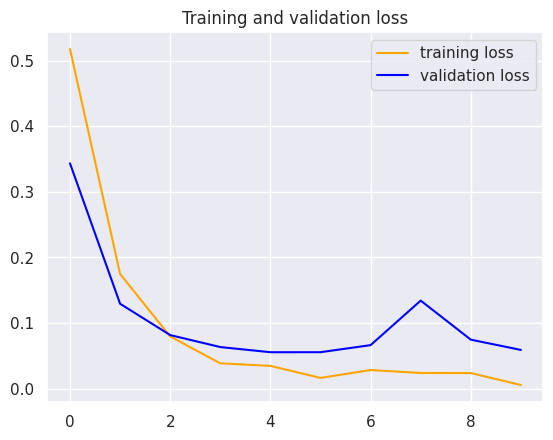

In [54]:
acc = history_rnn.history['acc']
val_acc = history_rnn.history['val_acc']
loss = history_rnn.history['loss']
val_loss = history_rnn.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training loss')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [55]:
pred = model.predict(emails_test).argmax(axis=1)
acc = model.evaluate(emails_test, y_test)
proba_rnn = model.predict(emails_test)
from sklearn.metrics import confusion_matrix
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))
print(confusion_matrix(pred, y_test))

35/35 [==============================] - 1s 14ms/step
Test loss is 0.09 accuracy is 0.97  
[[960 155]
 [  0   0]]


## LSTM

In [56]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_ltsm = model.fit(emails_train, y_train, epochs=10, batch_size=30, validation_split=0.2)

Epoch 1/10
119/119 [==============================] - 25s 129ms/step - loss: 0.2439 - acc: 0.9161 - val_loss: 0.1080 - val_acc: 0.9776
Epoch 2/10
119/119 [==============================] - 15s 128ms/step - loss: 0.0646 - acc: 0.9846 - val_loss: 0.0761 - val_acc: 0.9742
Epoch 3/10
119/119 [==============================] - 16s 134ms/step - loss: 0.0373 - acc: 0.9902 - val_loss: 0.0506 - val_acc: 0.9877
Epoch 4/10
119/119 [==============================] - 15s 127ms/step - loss: 0.0267 - acc: 0.9938 - val_loss: 0.0682 - val_acc: 0.9809
Epoch 5/10
119/119 [==============================] - 15s 127ms/step - loss: 0.0213 - acc: 0.9947 - val_loss: 0.0471 - val_acc: 0.9877
Epoch 6/10
119/119 [==============================] - 15s 128ms/step - loss: 0.0143 - acc: 0.9966 - val_loss: 0.0520 - val_acc: 0.9877
Epoch 7/10
119/119 [==============================] - 15s 126ms/step - loss: 0.0099 - acc: 0.9978 - val_loss: 0.0513 - val_acc: 0.9854
Epoch 8/10
119/119 [==============================] - 1

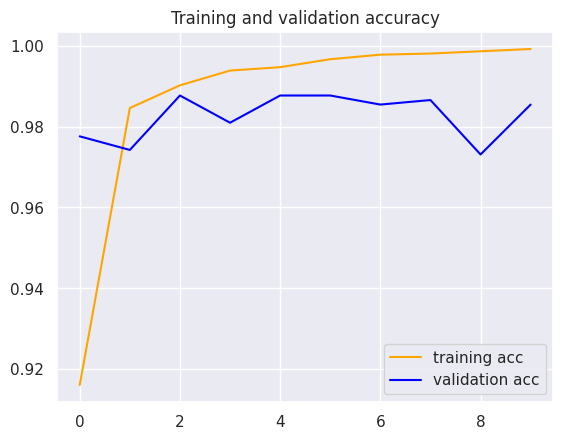

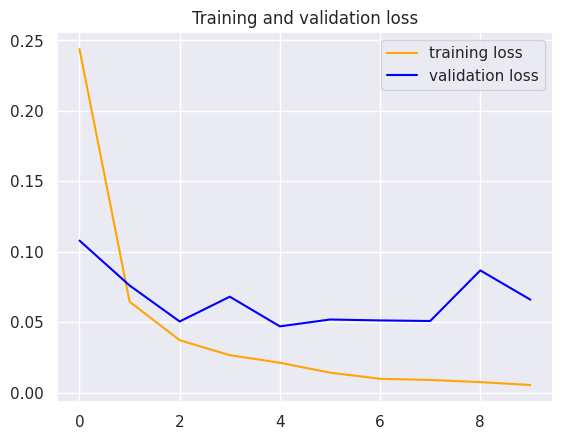

In [57]:
acc = history_ltsm.history['acc']
val_acc = history_ltsm.history['val_acc']
loss = history_ltsm.history['loss']
val_loss = history_ltsm.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training loss')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [62]:

pred = model.predict(emails_test).argmax(axis=1)
acc = model.evaluate(emails_test, y_test)
proba_lstm = model.predict(emails_test)
from sklearn.metrics import confusion_matrix
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))
print(confusion_matrix(pred, y_test))

35/35 [==============================] - 2s 44ms/step
Test loss is 0.12 accuracy is 0.98  
[[960 155]
 [  0   0]]
